# Baseline: K neareast neighbors classifier on metadata

In [280]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [281]:
metadata = pd.read_csv('data/training_set_metadata.csv').fillna(0) # import df and replace NaN's w/ zero. 
metadata = metadata.sample(frac=1) # randomly shuffle dataframe

In [282]:
metadata

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
3581,33463014,301.331787,-50.091457,348.817085,-32.051786,0,0.1823,0.2154,0.0173,40.1366,0.043,62
6617,103252558,154.335938,0.746060,241.925376,44.600760,0,0.0000,0.0000,0.0000,0.0000,0.028,65
4954,65415763,335.742188,-2.238686,61.517267,-46.631171,0,0.7548,0.7252,0.0131,43.2410,0.062,42
3464,30606045,107.964424,-42.410164,253.526289,-14.421946,0,0.0000,0.0000,0.0000,0.0000,0.124,6
1478,239835,150.820312,3.134927,236.341348,43.230123,1,0.0000,0.0000,0.0000,0.0000,0.016,65
1429,233523,151.171875,2.238686,237.619933,42.994783,1,0.7865,0.8273,0.0573,43.5922,0.024,90
4262,49256381,61.347656,-0.298417,191.259159,-36.315300,0,0.3487,0.3764,0.0318,41.5290,0.216,90
3375,28730623,146.250000,-31.914005,262.980195,16.136232,0,0.5051,0.5954,0.0478,42.7185,0.096,90
1708,276083,33.574219,-5.379379,168.838090,-60.637536,1,2.6752,2.5249,0.5812,46.5739,0.017,88
6841,108255616,146.777344,-37.921650,267.426219,11.930993,0,0.0000,0.0000,0.0000,0.0000,0.149,16


In [283]:
# Make training - validation/test split
X_train = metadata.iloc[:7000,0:11].values
y_train = metadata.iloc[:7000,11].values

X_test = metadata.iloc[7000:,0:11].values
y_test = metadata.iloc[7000:,11].values

In [284]:
#impliment KNN classifier with 1 nearest neighbor. Cheap and easy
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=200)
neigh.fit(X_train, y_train) 
preds = neigh.predict(X_test)


In [285]:
classes = np.sort(np.unique(preds))
transformed = []
for i in range(len(preds)):
    probabilities = (preds[i] == classes)*1.0
    probabilities = np.pad(probabilities, (0, 14 - len(classes)), 'constant')
    transformed.append(probabilities)


In [286]:
from sklearn.metrics import log_loss

In [287]:
len(y_test)

848

In [288]:
log_loss(y_test, np.array(transformed))

32.33937318108384

In [291]:
correct_predictions = np.sum((preds == y_test)*1.0)
accuracy = correct_predictions/len(y_test)
print(accuracy)

0.28537735849056606


Hence implimenting a vanilla KNN classifer on the metadata yields a $\sim 16 \%$ accuracy

In [56]:
len(np.unique(metadata.object_id))

7848

In [113]:
N = []
for i in np.arange(len(targets)):
    N += [len(metadata.loc[metadata.target == targets[i]])]
w = N/np.sum(N)
print(targets)
print(w)

[ 6 15 16 42 52 53 62 64 65 67 88 90 92 95]
[0.01924057 0.06307339 0.117737   0.15201325 0.02331804 0.00382263
 0.06167176 0.01299694 0.125      0.02650357 0.04714577 0.29472477
 0.03045362 0.02229867]


In [ ]:
from sklearn.metrics import log_loss
log_loss(["a", "b", "b", "c" ],
         [[.05, .9,.05], [.9, .05,.05], [.8, .1,.1], [.8, .1,.1]])

In [192]:
def LogLoss(y_true, y_pred):
    y_clip = tf.clip_by_value(y_pred, 1e-15, 1-1e-15)
    loss = -(tf.reduce_mean(tf.reduce_mean(y_true*tf.log(y_clip), axis=0)/w))
    return loss

# Other stuff Im playing around wtith

In [10]:
get_dataframe(236222,5)

,object_id,mjd,passband,flux,flux_err,detected
473488,236222,59588.2562,5,17.700857,5.795408,0
473493,236222,59591.2463,5,63.560200,5.901518,1
473498,236222,59594.3015,5,130.973755,7.089346,1
473503,236222,59618.2320,5,119.969719,6.621769,1
473508,236222,59621.1662,5,114.974640,5.903600,1
473514,236222,59646.1026,5,110.979065,8.907183,1
473519,236222,59649.0859,5,122.472664,6.334378,1
473524,236222,59660.0794,5,123.405891,7.681517,1
473529,236222,59663.0518,5,107.755714,8.601400,1
473534,236222,59666.0551,5,110.749954,8.588726,1


In [141]:
# 236222, passband 5

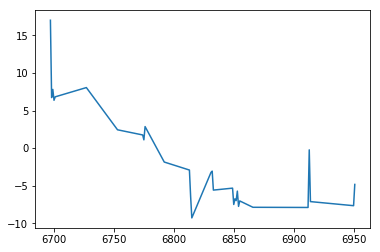

In [144]:
plt.plot(get_dataframe(unique_objects[20],0).flux)

In [140]:

mydf

,object_id,mjd,passband,flux,flux_err,detected
473488,236222,59588.2562,5,17.700857,5.795408,0
473493,236222,59591.2463,5,63.560200,5.901518,1
473498,236222,59594.3015,5,130.973755,7.089346,1
473503,236222,59618.2320,5,119.969719,6.621769,1
473508,236222,59621.1662,5,114.974640,5.903600,1
473514,236222,59646.1026,5,110.979065,8.907183,1
473519,236222,59649.0859,5,122.472664,6.334378,1
473524,236222,59660.0794,5,123.405891,7.681517,1
473529,236222,59663.0518,5,107.755714,8.601400,1
473534,236222,59666.0551,5,110.749954,8.588726,1


236222


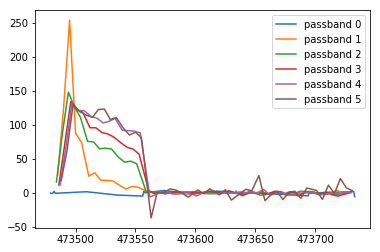

In [139]:
rand_obj = unique_objects[np.random.randint(len(unique_objects))]
print(rand_obj)
for i in range(6):
    mydf = get_dataframe(rand_obj,i)
    plt.plot(mydf.flux, label = 'passband ' + str(i))
plt.legend()
#plt.title('Object : ' + str(rand_obj) + 'detected = ' + str(mydf.detected[1]))

In [56]:
obj615 = df[(df.object_id == 615)]
obj615[obj615.passband == 1]

,object_id,mjd,passband,flux,flux_err,detected
1,615,59750.4306,1,-816.434326,5.553370,1
5,615,59752.4147,1,-1061.457031,6.472994,1
10,615,59767.3045,1,-815.188599,5.293019,1
15,615,59770.2256,1,-820.042786,5.875329,1
20,615,59779.3265,1,-921.002502,6.306800,1
25,615,59782.1974,1,-449.095612,4.028310,1
30,615,59797.2938,1,35.511822,3.163646,1
35,615,59800.3244,1,129.541901,4.358776,1
40,615,59807.1815,1,-420.796417,4.037735,1
45,615,59810.1122,1,-527.020325,4.204173,1


In [17]:
len(df)

1421705

In [15]:
len(np.unique(df.iloc[:,0]))

7848

In [7]:
df.loc['object_id']

KeyError: 'the label [object_id] is not in the [index]'